In [2]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=2d8b07b205810b57f5b8a94b3ad4231305bf8cdf2be3761ee010fee6b095f807
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [7]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore")


Prepare rules for the all the data sets 
1. Try different values of support and confidence 
Observe the change in number of rules for different support, confidence values
2. Change the minimum length in aprirori algorithm
3. Visulize the obtained rules using different plots.

In [8]:
df = pd.read_csv("book.csv")
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [9]:
df1 = df.copy()

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [11]:
df1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [12]:
df1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [13]:
df1.shape

(2000, 11)

In [14]:
item_sets = {}

In [16]:
te = TransactionEncoder()
te_ary = te.fit(df1).transform(df1)
ap = pd.DataFrame(te_ary, columns=te.columns_)

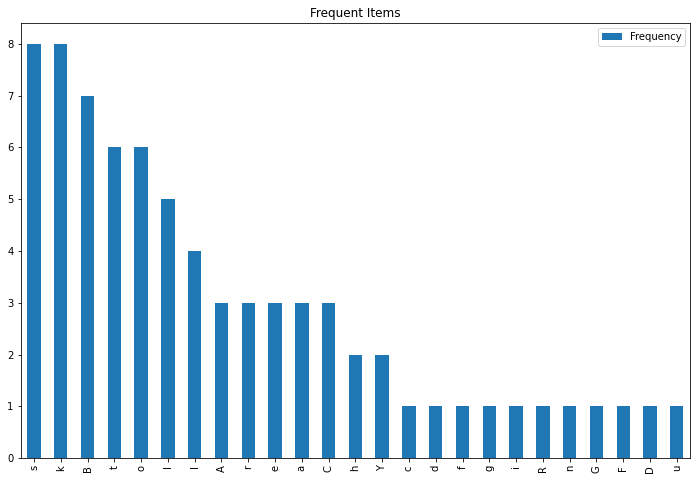

In [17]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()


In [18]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [20]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [21]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i = apriori(df1,support,True)
        rule = association_rules(ap_i,min_threshold = i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support : %s"%support)

In [22]:
confs = []

In [23]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

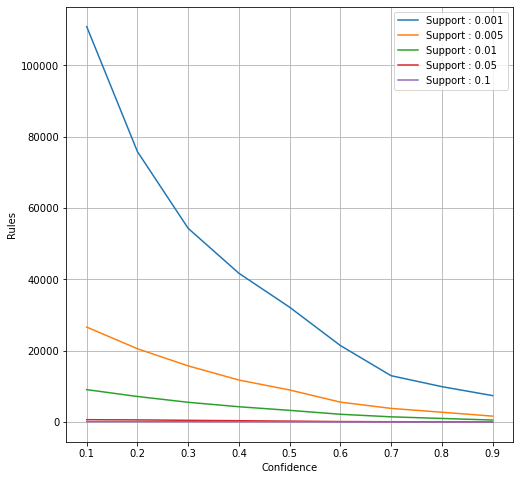

In [24]:
all_conf = pd.concat(confs,axis=1)
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

Conslusion

As shown in above graph
1. Lower the Confidence level Higher the no. or rules.
2. Higher the Support, lower the no. of rules.

In [26]:
ap_final =  apriori(ap,0.001,True)

In [27]:
rules_final = association_rules(ap_final,min_threshold = .4, support_only = False)

In [28]:
rules_final[rules_final['confidence']>0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
2,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
5,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
6,(A),(r),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
...,...,...,...,...,...,...,...,...,...
741,"(Y, B)","(s, o, t, k)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
742,"(Y, k)","(s, o, t, B)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
743,"(Y, s)","(o, t, B, k)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
744,"(t, B)","(o, s, Y, k)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970


In [29]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

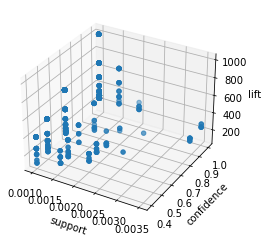

In [30]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

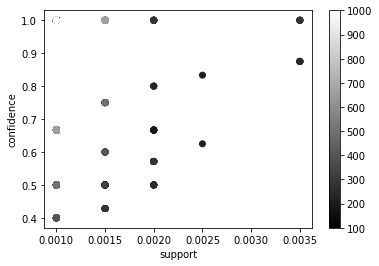

In [31]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

#  My movies

Prepare rules for the all the data sets
1. Try different values of support and confidence.
Observe the change in number of rules for different support, confidenc values.
2. Change the minimum length in apriori algorithm
3. Visulize the obtained rules using different plots

In [32]:
df = pd.read_csv("my_movies.csv")
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [33]:
df1 = df.iloc[:,5:]
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [34]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sixth Sense,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
Gladiator,10.0,0.7,0.483046,0.0,0.25,1.0,1.0,1.0
LOTR1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Patriot,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
LOTR2,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter2,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
LOTR,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Braveheart,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Green Mile,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0


In [35]:
df1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [36]:
df1.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

In [37]:
df1.shape

(10, 10)

In [38]:
item_sets = {}
te = TransactionEncoder()
te_ary = te.fit(df1).transform(df1)
ap = pd.DataFrame(te_ary, columns=te.columns_)

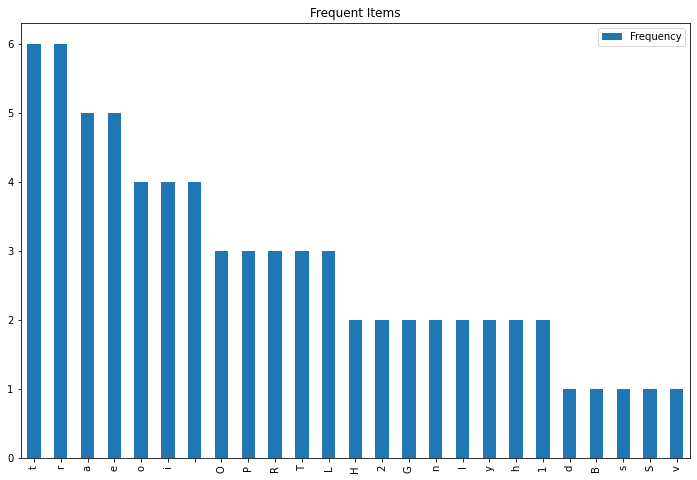

In [39]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

In [40]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [41]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [42]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [43]:
confs = []

In [44]:
for i in [0.005,0.001,0.003,0.007]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

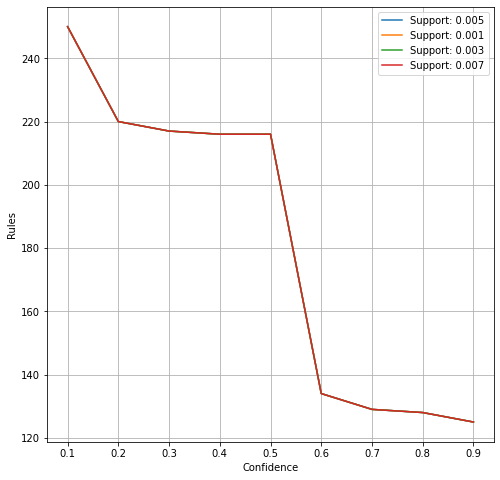

In [45]:
all_conf = pd.concat(confs,axis=1)
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

Conclsion
As shown in above graph
1. Lower the Confidence level Higher the no. of rules.
2. Higher the support, lower the no of rules.

In [46]:
ap_final =  apriori(ap,0.005,True)
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(H),( ),0.2,0.4,0.2,1.000000,2.500000,0.12,inf
5,(M),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
7,(P),( ),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8
8,(S),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
11,( ),(e),0.4,0.5,0.4,1.000000,2.000000,0.20,inf
...,...,...,...,...,...,...,...,...,...
113707,"(2, a)","(y, P, o, r, t, e, H, )",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113708,"(2, t)","(y, P, o, r, a, e, H, )",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113709,"(2, e)","(y, P, o, r, a, t, H, )",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113710,"(2, H)","(y, P, o, r, a, t, e, )",0.1,0.2,0.1,1.000000,5.000000,0.08,inf


In [47]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

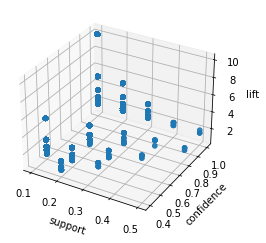

In [48]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

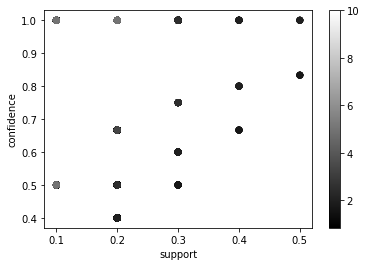

In [49]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")